In [62]:
import skfda
import numpy as np

# Comparativa datasets: AEMET y Canadian Weather
### Canadian Weather
Descargamos el dataset de Canadian Weather y comprobamos los campos que posee.

In [35]:
data = skfda.datasets.fetch_weather()
data.keys()

dict_keys(['data', 'target', 'target_names', 'target_feature_names', 'DESCR'])

El dataset se compone de 35 observaciones diferentes, muestreadas a lo largo de 365 días, siendo cada una de ellas bidimensional (temperatura y precipitaciones).

In [36]:
type(data['data'])

skfda.representation.grid.FDataGrid

In [37]:
data['data'].data_matrix.shape

(35, 365, 2)

Cada observación corresponde a un tipo de clima de entre cuatro distintos.

In [38]:
data['target']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0])

In [39]:
data['target_names']

array(['Arctic', 'Atlantic', 'Continental', 'Pacific'], dtype='<U11')

In [40]:
data['target_feature_names']

['region']

Al realizar el gráfico de los datos obtenemos dos gráficas en dos dimensiones separadas.

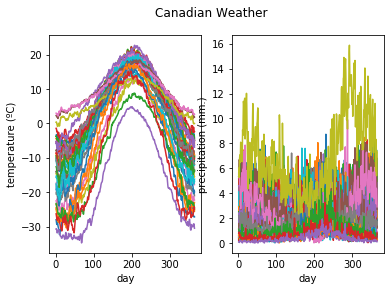

In [42]:
fig = data['data'].plot()

In [43]:
data_aemet = skfda.datasets.fetch_aemet()
data_aemet.keys()

dict_keys(['data', 'meta', 'meta_names', 'meta_feature_names', 'DESCR'])

In [50]:
print('Tipo de data:', type(data_aemet['data']))
print('Longitud de data: ', len(data_aemet['data']))
print('Tipo de data[0]: ', type(data_aemet['data'][0]))
print('Shape de data[0]: ', data_aemet['data'][0].data_matrix.shape)
print('Shape de data[1]: ', data_aemet['data'][1].data_matrix.shape)
print('Shape de data[2]: ', data_aemet['data'][2].data_matrix.shape)

Tipo de data: <class 'tuple'>
Longitud de data:  3
Tipo de data[0]:  <class 'skfda.representation.grid.FDataGrid'>
Shape de data[0]:  (73, 365, 1)
Shape de data[1]:  (73, 365, 1)
Shape de data[2]:  (73, 365, 1)


In [54]:
data_aemet['meta'].shape

(73, 6)

In [56]:
data_aemet['meta'][0]

array(['1387', 'A CORUÑA', 'A CORUÑA', 58, -8.419444444444444,
       43.367222222222225], dtype=object)

In [58]:
data_aemet['meta_names']

['ind', 'name', 'province', 'altitude', 'longitude', 'latitude']

In [68]:
data_aemet['meta_feature_names']

['location']

In [72]:
fd_wind.axes_labels

array(['day', 'm/s'], dtype='<U3')

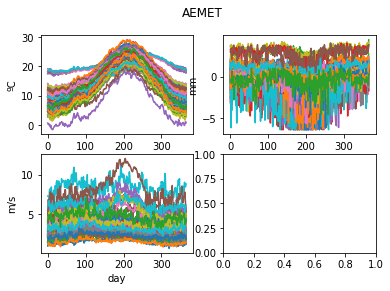

In [75]:
fd_temp = data_aemet['data'][0]
fd_logprec = data_aemet['data'][1]
fd_wind = data_aemet['data'][2]

data_matrix = np.empty((73, 365, 3))
data_matrix[:, :, 0] = fd_temp.data_matrix[:, :, 0]
data_matrix[:, :, 1] = fd_logprec.data_matrix[:, :, 0]
data_matrix[:, :, 2] = fd_wind.data_matrix[:, :, 0]

fd = fd_temp.copy(data_matrix=data_matrix, axes_labels=['day', 'ºC', 'mm', 'm/s'], dataset_label='AEMET')
fig = fd.plot()